# Nell Hanna and Trevor Yandow - Project 6

### Introduction
For our project, we asked the question: “How can we predict popular music based on popular music history and the songs’ attributes?” We chose this dataset and question because of the immense relevance of popular music and the large market that accompanies it. The way in which music is consumed is constantly changing and we wanted to try to figure out a specific algorithm that could be effective in the prediction of upcoming popular songs, based on factors in our dataset. The data we used to train our algorithm was data from the top songs from 2010 to 2018 given to us by Spotify, one of the top music streaming platforms. Our dataset contained values of song title, artist, genre, year, beats per minute, energy, danceability, loudness, liveness, valence, length, acousticness, speechiness and popularity.The input values to our algorithm were the beats per minute, loudness, valence, length, acousticness, the energy, and the danceability. We did not use the values of year, song title, liveness, speechiness, and genre because we decided they were not as important. We used the song's popularity score, changing the value to a 1 or a 0, to train the algorithms to accurately predict whether a song would be popular or not popular based on the values we used in our input. Finally, we trained our algorithms to see if it could accurately predict if the songs from 2019 were popular or not.

### Related work
We did find research or other projects related to our project, even just a Google of “popular music predictor” showed essentially our goals in predicting the top songs of upcoming years using previous data. Our work is similar in goal, but different in implementation. We utilized algorithms from class which were inherently different from perhaps more advanced algorithms, in combination with limited columns within our dataset.


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

### Dataset and Feature Insights and Visualizations 
We had 572 songs that we trained our data on and then we tested it on 50 songs. We got the training data set from https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year and then we got the testing data set from https://www.kaggle.com/leonardopena/top50spotify2019 We did not do any preprocessing. Our algorithm uses the beats per minute (the tempo of the song), loudness, valence (positive mood for the song), length, and acousticness (the higher values are more acoustic songs). The algorithm also took in the energy where the higher the value the more energetic the song is, the danceability the higher the value the easier it is to dance to the song. The algorithm has a popularity score ranging from 1 to 100 but we changed the value to a 1 if it was greater than 71 or a 0 if it was less than 71. We used the song's popularity score to train the algorithms to accurately predict whether a song would be popular or not popular based on the values we used in our input. 


In [2]:
#Top 10 songs from 2010-2019
data = pd.read_csv("/Users/Trevor/top10s.csv")
data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
#Remaning Columns
data.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 'year':'year', 'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)
data.head()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
#Removing songs from 2019
data_clean = data[data.year != 2019]
data_clean = data_clean.drop(['liveness', 'speechiness'], axis = 1)
#Setting super popular song to 1 others to 0
x = 71
data_clean['popularity'].values[data_clean['popularity'].values < x] = 0
data_clean['popularity'].values[data_clean['popularity'].values >= x] = 1

data_clean.tail()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,valence,length,acousticness,popularity
567,Supplies,Justin Timberlake,dance pop,2018,120,55,79,-7,23,226,1,0
568,Boom Boom,RedOne,moroccan pop,2018,110,76,75,-8,58,248,0,0
569,...Ready For It? - BloodPop� Remix,Taylor Swift,pop,2018,160,84,58,-5,50,190,13,0
570,Drip (feat. Migos),Cardi B,pop,2018,130,59,97,-8,27,264,5,0
571,Tell Me You Love Me - NOTD Remix,Demi Lovato,dance pop,2018,102,77,58,-5,76,182,5,0


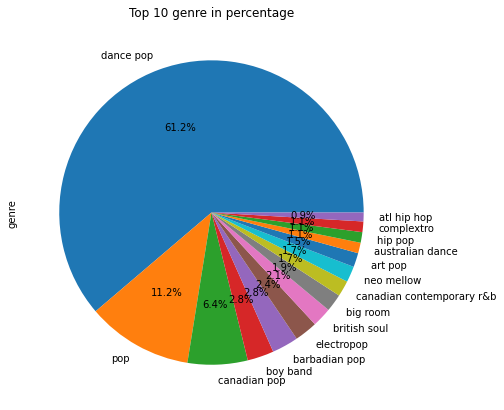

In [6]:
#Top 15 Genres
data['genre'].value_counts().head(15).plot.pie(figsize=(7,7),autopct='%1.1f%%')
plt.title('Top 10 genre in percentage')
plt.show()

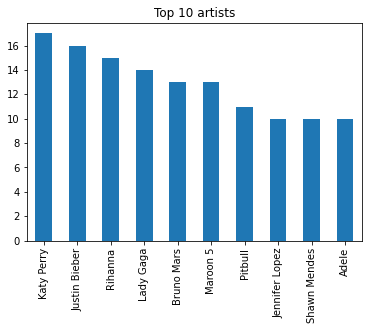

In [7]:
#Top 10 artists
data_clean['artist'].value_counts().head(10).plot.bar()
plt.title('Top 10 artists')
plt.show()

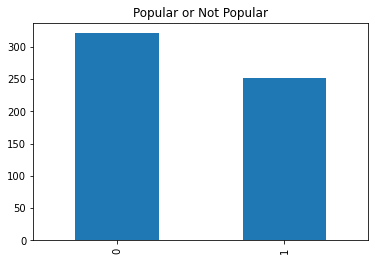

In [8]:
#Super popular vs popular songs
data_clean['popularity'].value_counts().plot.bar()
plt.title('Popular or Not Popular')
plt.show()

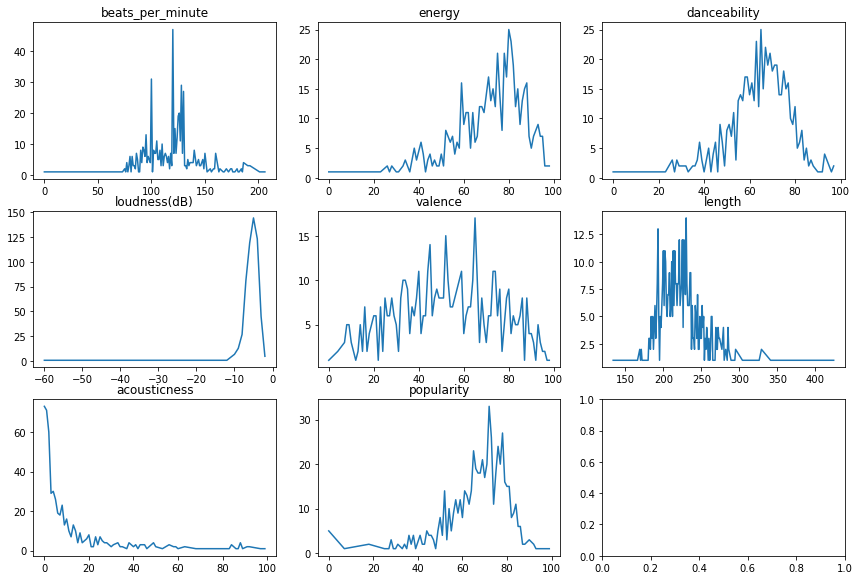

In [9]:
#Frequency of each values
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
plt.tight_layout()
axes[0][0].plot(data_clean['beats_per_minute'].value_counts().sort_index())
axes[0][0].set_title('beats_per_minute')
axes[0][1].plot(data_clean['energy'].value_counts().sort_index())
axes[0][1].set_title('energy')
axes[0][2].plot(data_clean['danceability'].value_counts().sort_index())
axes[0][2].set_title('danceability')
axes[1][0].plot(data_clean['loudness'].value_counts().sort_index())
axes[1][0].set_title('loudness(dB)')
axes[1][1].plot(data_clean['valence'].value_counts().sort_index())
axes[1][1].set_title('valence')
axes[1][2].plot(data_clean['length'].value_counts().sort_index())
axes[1][2].set_title('length')
axes[2][0].plot(data_clean['acousticness'].value_counts().sort_index())
axes[2][0].set_title('acousticness')
axes[2][1].plot(data['popularity'].value_counts().sort_index())
axes[2][1].set_title('popularity')

plt.show()

In [10]:
data_train = data_clean.drop(['song','artist', 'genre', 'year','popularity'], axis = 1)
data_train.head()

,beats_per_minute,energy,danceability,loudness,valence,length,acousticness
0,97,89,67,-4,80,217,19
1,87,93,75,-5,64,263,24
2,120,84,76,-3,71,200,10
3,119,92,70,-4,71,295,0
4,109,84,64,-5,43,221,2


### Methods 
The learning algorithms we used were BernoulliNB, DecisionTree, Perceptron, and RandomForest. First, BernoulliNB is a classifier that utilizes discrete data and is designed for binary data. Next, DecisionTree works by comparison within the data of older attributes with newer attributes, starting from the “root” of the tree. Additionally, Perceptron works essentially as a neural network, and classifies as such. Finally, RandomForest works by building decision trees and thereafter using the mode to classify and make predictions.


In [11]:
#Bernoulli
cl_bern = BernoulliNB()
cl_bern.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_bern, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_bern,data_train, data_clean['popularity'], cv=5)
cv_avgBern = np.mean(cv_score)
precisionBern = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallBern = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgBern)
print(precisionBern)
print(recallBern)

0.5594355453852022
0.5594405594405595
0.5594405594405595


In [12]:
#Decision Tree
cl_dectree = DecisionTreeClassifier()
cl_dectree.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_dectree, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_dectree,data_train, data_clean['popularity'], cv=5)
cv_avgDectree = np.mean(cv_score)
precisionDectree = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallDectree = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgDectree)
print(precisionDectree)
print(recallDectree)

0.5593440122044241
0.5611888111888111
0.5611888111888111


In [13]:
#Perceptron
cl_percep = Perceptron()
cl_percep.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_percep, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_percep,data_train, data_clean['popularity'], cv=5)
cv_avgPercep = np.mean(cv_score)
precisionPercep = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallPercep = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgPercep)
print(precisionPercep)
print(recallPercep)

0.5088024408848207
0.5087412587412588
0.5087412587412588


In [14]:
#Random Forest
cl_randforest = RandomForestClassifier()
cl_randforest.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_randforest, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_randforest,data_train, data_clean['popularity'], cv=5)
cv_avgrandforest = np.mean(cv_score)
precisionrandforest = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallrandforest = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgrandforest)
print(precisionrandforest)
print(recallrandforest)

0.5770404271548436
0.5856643356643356
0.5856643356643356


In [15]:
table = pd.DataFrame(index = ['Bernoulli', 'DecisionTree', 'Perceptron', 'RandForest'])
classification = [cv_avgBern, cv_avgDectree, cv_avgPercep, cv_avgrandforest]
precision = [precisionBern, precisionDectree, precisionPercep, precisionrandforest]
recall = [recallBern, recallDectree, recallPercep, recallrandforest]
table['Classification'] = classification
table['Precision'] = precision
table['Recall'] = recall

In [16]:
#Top 50 songs from 2019 to test
data2 = pd.read_csv("/Users/Trevor/top50.csv")
data2.drop('Unnamed: 0', axis=1, inplace=True)
data2.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [17]:
data2.rename(columns={'Track.Name':'song', 'Artist.Name':'artist', 'Genre':'genre', 'Beats.Per.Minute':'beats_per_minute','Energy':'energy',
                    'Danceability':'danceability','Loudness..dB..':'loudness','Liveness':'liveness', 'Valence.':'valence', 'Length.':'length', 
                    'Acousticness..':'acousticness','Speechiness.':'speechiness','Popularity':'popularity'}, inplace=True)
data2.head()

,song,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [18]:
data_clean2 = data2.copy()
data_clean2 = data_clean2.drop(['liveness', 'speechiness'], axis = 1)
data_clean2['popularity'].values[data_clean2['popularity'].values < x] = 0
data_clean2['popularity'].values[data_clean2['popularity'].values >= x] = 1

data_clean2.head()

,song,artist,genre,beats_per_minute,energy,danceability,loudness,valence,length,acousticness,popularity
0,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,75,191,4,1
1,China,Anuel AA,reggaeton flow,105,81,79,-4,61,302,8,1
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,70,186,12,1
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,55,198,12,1
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,18,175,45,1


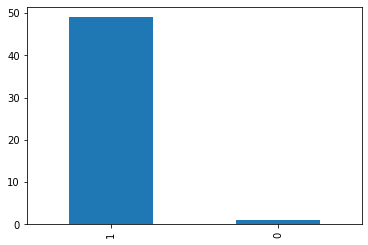

In [19]:
data_clean2['popularity'].value_counts().plot.bar()
plt.show()

In [20]:
data_train2 = data_clean2.drop(['song', 'artist', 'genre', 'popularity'], axis = 1)
data_train2.head()

,beats_per_minute,energy,danceability,loudness,valence,length,acousticness
0,117,55,76,-6,75,191,4
1,105,81,79,-4,61,302,8
2,190,80,40,-4,70,186,12
3,93,65,64,-8,55,198,12
4,150,65,58,-4,18,175,45


In [21]:
#Test with Bernoulli
prediction = cl_bern.predict(data_train2)
avg_classBern = cl_bern.score(data_train2, data_clean2['popularity'])
precisionBern = precision_score(data_clean2['popularity'], prediction, average='micro')
recallBern = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classBern)
print("Precision: ", precisionBern)
print("Recall: ", recallBern)

CCR:  0.02
Precision:  0.02
Recall:  0.02


In [22]:
#Test with Decision Tree
prediction = cl_dectree.predict(data_train2)
avg_classDecTree = cl_dectree.score(data_train2, data_clean2['popularity'])
precisionDecTree = precision_score(data_clean2['popularity'], prediction, average='micro')
recallDecTree = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classDecTree)
print("Precision: ", precisionDecTree)
print("Recall: ", recallDecTree)

CCR:  0.52
Precision:  0.52
Recall:  0.52


In [23]:
#Test with Perceptron
prediction = cl_percep.predict(data_train2)
avg_classPercep = cl_percep.score(data_train2, data_clean2['popularity'])
precisionPercep = precision_score(data_clean2['popularity'], prediction, average='micro')
recallPercep = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classPercep)
print("Precision: ", precisionPercep)
print("Recall: ", recallPercep)

CCR:  0.86
Precision:  0.86
Recall:  0.86


In [24]:
#Test with Random Forest
prediction = cl_randforest.predict(data_train2)
avg_classRandForest = cl_randforest.score(data_train2, data_clean2['popularity'])
precisionRandForest = precision_score(data_clean2['popularity'], prediction, average='micro')
recallRandForest = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classRandForest)
print("Precision: ", precisionRandForest)
print("Recall: ", recallRandForest)

CCR:  0.66
Precision:  0.66
Recall:  0.66


In [25]:
table2 = pd.DataFrame(index = ['Bernoulli', 'DecisionTree', 'Perceptron', 'RandForest'])
classification = [avg_classBern, avg_classDecTree, avg_classPercep, avg_classRandForest]
precision = [precisionBern, precisionDecTree, precisionPercep, precisionRandForest]
recall = [recallBern, recallDecTree, recallPercep, recallRandForest]
table2['Classification'] = classification
table2['Precision'] = precision
table2['Recall'] = recall

### Experiments/Results/Discussion 
From our experiments, we found it is very hard to predict which songs will be popular or not from these values. We used a similar format of experiments that we completed during homework 5 to finish this project. We chose certain hyperparameters and estimators because of how well they performed during homework 5. We also did five fold cross validation, once again similar to homework 5. We did use ensemble methods, such as DecisionTree.

Our results show that the DecisionTree and RandomForest classifiers worked the best. The matrix that we used to determine this was by looking at the classification rate, precision and recall. During the training we found that the DecisionTree has a classification rate of 0.559344 and in the testing it had a classification rate of 0.52. These two values are extremely similar which shows that our algorithm is working consistently but only 50 percent of the time. The RandomForest also had a classification rate during train and test of 0.577040 and 0.66 respectively. This algorithm did not work as consistently but had a relatively successful rate. Our precision and recall scores for both of these algorithms were not very good which tells us that they are getting a lot of false positives and false negatives. This shows us that it is very hard to predict whether a song is going to be popular or not.

We wanted to see if we could make our algorithms more successful by converting artists into a binary value so as to help the algorithms in their classifications. Essentially, this had minimal effect on the classifiers but did improve the RandomForest substantially in its classification. We thought that this conversion would help because the binary value is less convoluted than a name of an artist and would contribute more as we made the top ten artists into ones and the rest into zeroes. We were somewhat disappointed with the lack of improvement in our results.


In [26]:
#Training without binary artist
table

,Classification,Precision,Recall
Bernoulli,0.559436,0.559441,0.559441
DecisionTree,0.559344,0.561189,0.561189
Perceptron,0.508802,0.508741,0.508741
RandForest,0.577040,0.585664,0.585664


In [27]:
#Testing without binary artist
table2

,Classification,Precision,Recall
Bernoulli,0.02,0.02,0.02
DecisionTree,0.52,0.52,0.52
Perceptron,0.86,0.86,0.86
RandForest,0.66,0.66,0.66


### Setting artists to 1 or 0

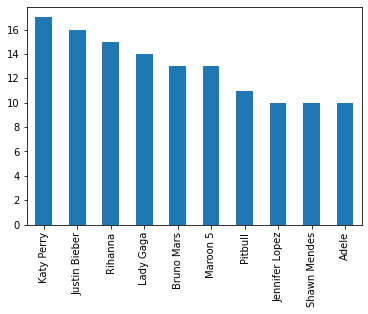

In [28]:
data_clean['artist'].value_counts().head(10).plot.bar()
plt.show()

In [29]:
data_clean['artist'].values[data_clean['artist'].values == "Katy Perry"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Justin Bieber"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Rihanna"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Lady Gaga"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Maroon 5"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Bruno Mars"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Pitbull"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Shawn Mendes"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Adele"] = 1
data_clean['artist'].values[data_clean['artist'].values == "Jennifer Lopez"] = 1
data_clean['artist'].values[data_clean['artist'].values != 1] = 0

In [30]:
data_clean.head()

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,valence,length,acousticness,popularity
0,"Hey, Soul Sister",0,neo mellow,2010,97,89,67,-4,80,217,19,1
1,Love The Way You Lie,0,detroit hip hop,2010,87,93,75,-5,64,263,24,1
2,TiK ToK,0,dance pop,2010,120,84,76,-3,71,200,10,1
3,Bad Romance,1,dance pop,2010,119,92,70,-4,71,295,0,1
4,Just the Way You Are,1,pop,2010,109,84,64,-5,43,221,2,1


In [31]:
data_train = data_clean.drop(['song', 'genre', 'year','popularity'], axis = 1)
data_train.head()

,artist,beats_per_minute,energy,danceability,loudness,valence,length,acousticness
0,0,97,89,67,-4,80,217,19
1,0,87,93,75,-5,64,263,24
2,0,120,84,76,-3,71,200,10
3,1,119,92,70,-4,71,295,0
4,1,109,84,64,-5,43,221,2


In [32]:
#Bernoulli
cl_bern = BernoulliNB()
cl_bern.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_bern, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_bern,data_train, data_clean['popularity'], cv=5)
cv_avgBern = np.mean(cv_score)
precisionBern = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallBern = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgBern)
print(precisionBern)
print(recallBern)

0.5437833714721587
0.5437062937062938
0.5437062937062938


In [33]:
#Decision Tree
cl_dectree = DecisionTreeClassifier()
cl_dectree.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_dectree, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_dectree,data_train, data_clean['popularity'], cv=5)
cv_avgDectree = np.mean(cv_score)
precisionDectree = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallDectree = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgDectree)
print(precisionDectree)
print(recallDectree)

0.5348893974065598
0.5506993006993007
0.5506993006993007


In [34]:
#Perceptron
cl_percep = Perceptron()
cl_percep.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_percep, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_percep,data_train, data_clean['popularity'], cv=5)
cv_avgPercep = np.mean(cv_score)
precisionPercep = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallPercep = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgPercep)
print(precisionPercep)
print(recallPercep)

0.5088024408848207
0.5087412587412588
0.5087412587412588


In [35]:
#RandomForest
cl_randforest = RandomForestClassifier()
cl_randforest.fit(data_train, data_clean['popularity'])
cv_pred = cross_val_predict(cl_randforest, data_train, data_clean['popularity'], cv=5)
cv_score = cross_val_score(cl_randforest,data_train, data_clean['popularity'], cv=5)
cv_avgrandforest = np.mean(cv_score)
precisionrandforest = precision_score(data_clean['popularity'], cv_pred, average='micro')
recallrandforest = recall_score(data_clean['popularity'], cv_pred, average='micro')
print(cv_avgrandforest)
print(precisionrandforest)
print(recallrandforest)

0.5733790999237224
0.5804195804195804
0.5804195804195804


In [36]:
table3 = pd.DataFrame(index = ['Bernoulli', 'DecisionTree', 'Perceptron', 'RandForest'])
classification = [cv_avgBern, cv_avgDectree, cv_avgPercep, cv_avgrandforest]
precision = [precisionBern, precisionDectree, precisionPercep, precisionrandforest]
recall = [recallBern, recallDectree, recallPercep, recallrandforest]
table3['Classification'] = classification
table3['Precision'] = precision
table3['Recall'] = recall

In [37]:
data_clean2['artist'].values[data_clean2['artist'].values == "Katy Perry"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Justin Bieber"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Rihanna"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Lady Gaga"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Maroon 5"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Bruno Mars"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Pitbull"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Shawn Mendes"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Adele"] = 1
data_clean2['artist'].values[data_clean2['artist'].values == "Jennifer Lopez"] = 1
data_clean2['artist'].values[data_clean2['artist'].values != 1] = 0
data_clean2.head()

,song,artist,genre,beats_per_minute,energy,danceability,loudness,valence,length,acousticness,popularity
0,Se�orita,1,canadian pop,117,55,76,-6,75,191,4,1
1,China,0,reggaeton flow,105,81,79,-4,61,302,8,1
2,boyfriend (with Social House),0,dance pop,190,80,40,-4,70,186,12,1
3,Beautiful People (feat. Khalid),0,pop,93,65,64,-8,55,198,12,1
4,Goodbyes (Feat. Young Thug),0,dfw rap,150,65,58,-4,18,175,45,1


In [38]:
data_train2 = data_clean2.drop(['song', 'genre', 'popularity'], axis = 1)
data_train2.head()

,artist,beats_per_minute,energy,danceability,loudness,valence,length,acousticness
0,1,117,55,76,-6,75,191,4
1,0,105,81,79,-4,61,302,8
2,0,190,80,40,-4,70,186,12
3,0,93,65,64,-8,55,198,12
4,0,150,65,58,-4,18,175,45


In [39]:
#Test with Bernoulli
prediction = cl_bern.predict(data_train2)
avg_classBern = cl_bern.score(data_train2, data_clean2['popularity'])
precisionBern = precision_score(data_clean2['popularity'], prediction, average='micro')
recallBern = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classBern)
print("Precision: ", precisionBern)
print("Recall: ", recallBern)

CCR:  0.02
Precision:  0.02
Recall:  0.02


In [40]:
#Test with DecisionTree
prediction = cl_dectree.predict(data_train2)
avg_classDecTree = cl_dectree.score(data_train2, data_clean2['popularity'])
precisionDecTree = precision_score(data_clean2['popularity'], prediction, average='micro')
recallDecTree = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classDecTree)
print("Precision: ", precisionDecTree)
print("Recall: ", recallDecTree)

CCR:  0.44
Precision:  0.44
Recall:  0.44


In [41]:
#Test with Perceptron
prediction = cl_percep.predict(data_train2)
avg_classPercep = cl_percep.score(data_train2, data_clean2['popularity'])
precisionPercep = precision_score(data_clean2['popularity'], prediction, average='micro')
recallPercep = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classPercep)
print("Precision: ", precisionPercep)
print("Recall: ", recallPercep)

CCR:  0.86
Precision:  0.86
Recall:  0.86


In [42]:
#Test with RandomForest
prediction = cl_randforest.predict(data_train2)
avg_classRandForest = cl_randforest.score(data_train2, data_clean2['popularity'])
precisionRandForest = precision_score(data_clean2['popularity'], prediction, average='micro')
recallRandForest = recall_score(data_clean2['popularity'], prediction, average='micro')
print("CCR: ", avg_classRandForest)
print("Precision: ", precisionRandForest)
print("Recall: ", recallRandForest)

CCR:  0.48
Precision:  0.48
Recall:  0.48


In [43]:
table4 = pd.DataFrame(index = ['Bernoulli', 'DecisionTree', 'Perceptron', 'RandForest'])
classification = [avg_classBern, avg_classDecTree, avg_classPercep, avg_classRandForest]
precision = [precisionBern, precisionDecTree, precisionPercep, precisionRandForest]
recall = [recallBern, recallDecTree, recallPercep, recallRandForest]
table4['Classification'] = classification
table4['Precision'] = precision
table4['Recall'] = recall

In [44]:
#Training with binary Artist
table3

,Classification,Precision,Recall
Bernoulli,0.543783,0.543706,0.543706
DecisionTree,0.534889,0.550699,0.550699
Perceptron,0.508802,0.508741,0.508741
RandForest,0.573379,0.580420,0.580420


In [45]:
#Testing with binary Artist
table4

,Classification,Precision,Recall
Bernoulli,0.02,0.02,0.02
DecisionTree,0.44,0.44,0.44
Perceptron,0.86,0.86,0.86
RandForest,0.48,0.48,0.48


### Conclusion/Future Work 
In summary, we discovered it is incredibly difficult to predict popular upcoming songs. It would be interesting to see if we had access to more specific attributes along with more data and see how that would change our outcomes, even though we felt our dataset size was sufficient enough. The algorithm that was highest performing was initially DecisionTree, but after we made artists a binary value, RandomForest became the highest performing algorithm. We think that some algorithms work better than others because with DecisionTree for example, our data is workable within that algorithm due to its use of comparison with older songs to newer songs. However, certain algorithms we thought would perform better did not, such as RandomForest by a landslide just due to its strength in many situations as a classifier. If we were to have more time, more classmates, and more computational resources, we would explore which attributes have the most influence on whether a song is popular or not and how a song could best optimize the attributes to hopefully become popular.


### Contributions
Nell: Chose the topic and found a useful dataset. Worked on visualizing the data. Contributed to many aspects of the report.

Trevor: Analyzed how to use the algorithms from class in a useful and effective way on our data. Integral to the process of making popularity and artists into binary values. Contributed to many aspects of the report.